## Bu çalışmada görsellerin histogramları çıkartılıp karşılaştırılmıştır. 
### İlk olarak gerekli kütüphaneler çağrılır.

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import random

## Her bir görsel okunur. Opencv BGR formatında okuduğundan dolayı RGB formatına çevirilir. Daha sonra "Images" listinin içine entegre edilir. Bu liste rastgele karışıtırılarak "shuffled_images" listesi elde edilir. Devamında iki listedeki ilk elementleri görselleştiriyoruz

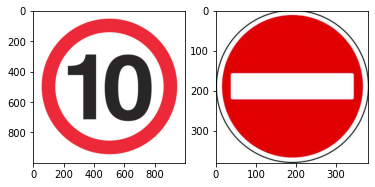

In [2]:
path = '../input/deneme-trafik'
images = []
for i in os.listdir(path):
    im_path = os.path.join(path,i)
    image = cv2.imread(im_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
shuffled_images = random.sample(images,len(images))

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(images[0])
f.add_subplot(1,2, 2)
plt.imshow(shuffled_images[0])
plt.show()

# "Histers" ve "new_histers" isminde iki farklı liste tanımlanmıştır. Bu listeler sırasıyla "images" ve "shuffled_images" listelerindeki görsellerin historgramlarıyla doldurulmuştur. Histogram ile doldurulmadan önce kolay karılaştırmak için normalize edilmiş ve düzleştirilmiştir.

In [3]:
histers = []
for i in images:
    hist = cv2.calcHist([i], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    histers.append(hist)

new_histers = []
for i in shuffled_images:
    hist = cv2.calcHist([i], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    new_histers.append(hist)

## Histogram görselleştirme

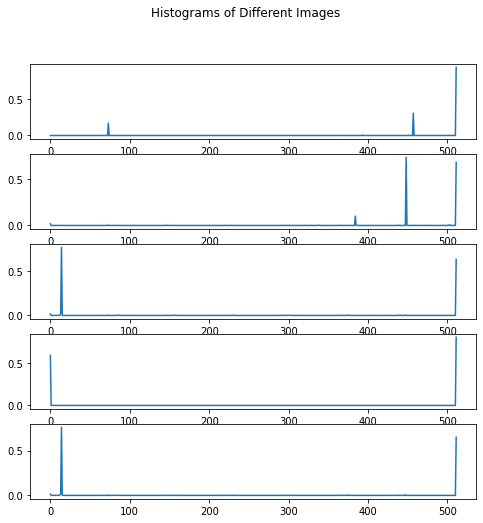

In [4]:
fig, axs = plt.subplots(len(histers),figsize=(8,8))
fig.suptitle('Histograms of Different Images')
for i in range(len(histers)):
    axs[i].plot(histers[i])

## Görsellerin histogramlarının permütasyonunu alarak her bir histogramı bir diğeriyle karşılaştırıyoruz. Daha sonra aralarındaki bağıntıyı puanlıyoruz. Görmüş olduğunuz gibi en çok 1. ve 4. görsel birbirine benziyor(%75).

In [5]:
import itertools
permutation = list(itertools.permutations([0, 1, 2, 3],2))
for i,k in permutation:
    print('Comparsion of {}th and {}th images'.format(i,k))
    print(cv2.compareHist(histers[i], histers[k], cv2.HISTCMP_CORREL))

Comparsion of 0th and 1th images
0.631407138987536
Comparsion of 0th and 2th images
0.5932090179292967
Comparsion of 0th and 3th images
0.7543969379144692
Comparsion of 1th and 0th images
0.631407138987536
Comparsion of 1th and 2th images
0.42606338156132134
Comparsion of 1th and 3th images
0.553134640779018
Comparsion of 2th and 0th images
0.5932090179292967
Comparsion of 2th and 1th images
0.42606338156132134
Comparsion of 2th and 3th images
0.5197226756224229
Comparsion of 3th and 0th images
0.7543969379144692
Comparsion of 3th and 1th images
0.553134640779018
Comparsion of 3th and 2th images
0.5197226756224229


# İki farklı liste oluşturup histogramlarını almıştık. İkinci listede görseller rastgele geliyordu. Şimdi iki listenin bütün kombinsyonlarının arasındaki benzerliğe bakalım ve görselleştirelim. Gördüğünüz gibi sadece aynı olan görseller ortaya çıkıyor. Bu şekilde sınıflandırma sağlanabiliyor.

0.631407138987536
0.7543969379144692
0.5932090179292967
1.0


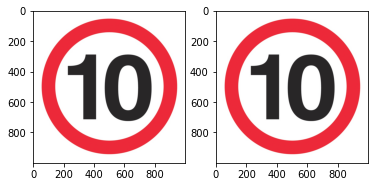

1.0


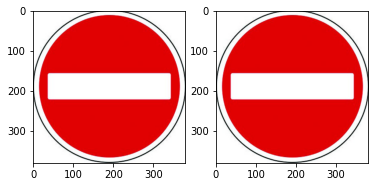

0.553134640779018
0.42606338156132134
0.631407138987536
0.42606338156132134
0.5197226756224229
1.0


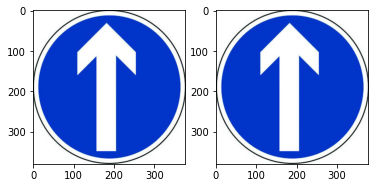

0.5932090179292967
0.553134640779018
1.0


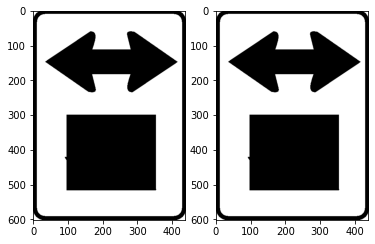

0.5197226756224229
0.7543969379144692


In [6]:
for i,k in list(itertools.product(range(4),range(4))):
    score = cv2.compareHist(histers[i], new_histers[k],cv2.HISTCMP_CORREL)
    print(score)
    if score >= 0.9:
        f = plt.figure()
        f.add_subplot(1,2, 1)
        plt.imshow(images[i])
        f.add_subplot(1,2, 2)
        plt.imshow(shuffled_images[k])
        plt.show()